In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
import pandas as pd
import os
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline



In [2]:
data = pd.read_csv('../input/Video_Games_Sales_as_at_22_Dec_2016.csv', header=0)
data.insert(loc=0, column='rank', value=range(1, data.shape[0] + 1))
print(data.shape)
data.head()


(16719, 17)


,rank,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.describe()

,rank,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16719.000000,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,8360.000000,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,4826.503911,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,4180.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,8360.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,12539.500000,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,16719.000000,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


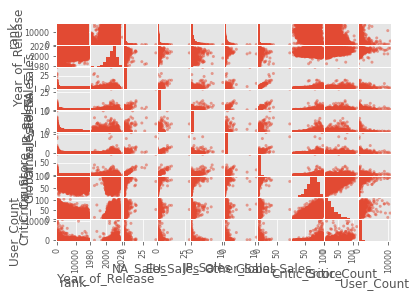

In [4]:
scatter_matrix(data)
pass


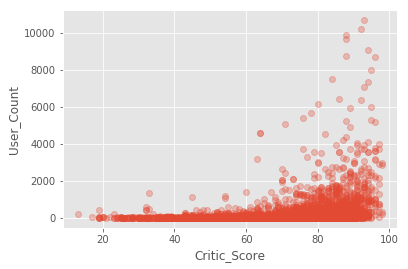

In [5]:
plt.plot(data['Critic_Score'], data['User_Count'], 'o', alpha=0.3)
plt.xlabel('Critic_Score')
plt.ylabel('User_Count')
pass

**Подготовка данных **

In [6]:

data.count(axis=0)

rank               16719
Name               16717
Platform           16719
Year_of_Release    16450
Genre              16717
Publisher          16665
NA_Sales           16719
EU_Sales           16719
JP_Sales           16719
Other_Sales        16719
Global_Sales       16719
Critic_Score        8137
Critic_Count        8137
User_Score         10015
User_Count          7590
Developer          10096
Rating              9950
dtype: int64

In [7]:
data.drop(['Name', 'NA_Sales', 'JP_Sales', 'EU_Sales', 'Other_Sales', 'Global_Sales'], axis=1, inplace=True)
data.dropna(inplace=True)
data.count()

rank               6825
Platform           6825
Year_of_Release    6825
Genre              6825
Publisher          6825
Critic_Score       6825
Critic_Count       6825
User_Score         6825
User_Count         6825
Developer          6825
Rating             6825
dtype: int64

In [8]:

data['User_Score'] = data['User_Score'].astype(float)

**Удалим Rating pending элементы**

In [9]:
print(data['Rating'].unique())

data.drop(data[data['Rating'] == 'RP'].index, inplace=True)
print(data['Rating'].unique())

['E' 'M' 'T' 'E10+' 'AO' 'K-A' 'RP']
['E' 'M' 'T' 'E10+' 'AO' 'K-A']


In [10]:
data['Rating'] = data['Rating'].map({'E': 0, 'K-A': 0, 'E10+': 1, 'T': 2, 'M': 3, 'AO': 4})
print(data['Rating'].unique())

[0 3 2 1 4]


**Разобьём таблицу на части по типу признака **

In [11]:

categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['Platform', 'Genre', 'Publisher', 'Developer']
['rank', 'Year_of_Release', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Rating']


In [12]:
data_describe = data.describe(include=[object])
binary_columns = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

[] ['Platform', 'Genre', 'Publisher', 'Developer']


In [13]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
data_nonbinary.columns

Index(['Platform_3DS', 'Platform_DC', 'Platform_DS', 'Platform_GBA',
       'Platform_GC', 'Platform_PC', 'Platform_PS', 'Platform_PS2',
       'Platform_PS3', 'Platform_PS4',
       ...
       'Developer_h.a.n.d. Inc.', 'Developer_iNiS', 'Developer_id Software',
       'Developer_id Software, Nerve Software',
       'Developer_id Software, Raven Software', 'Developer_n-Space',
       'Developer_neo Software', 'Developer_odenis studio',
       'Developer_syn Sophia', 'Developer_zSlide'],
      dtype='object', length=1579)

**Нормализация количественных признаков. **

**Многие алгоритмы машинного обучения чувствительны к масштабированию данных.**


К таким алгоритмам, например, относится метод ближайших соседей, машина опорных векторов и др.

В этом случае количественные признаки полезно нормализовать.
Это можно делать разными способами. Например, каждый количественный признак
приведем к нулевому среднему и единичному среднеквадратичному отклонению: 

In [14]:

data_numerical = data[numerical_columns]
data_numerical.describe()

,rank,Year_of_Release,Critic_Score,Critic_Count,User_Score,User_Count,Rating
count,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000
mean,6626.203253,2007.436254,70.273154,28.933617,7.185683,174.743992,1.463511
std,4516.255201,4.211336,13.869309,19.224481,1.440040,587.468861,1.131466
min,1.000000,1985.000000,13.000000,3.000000,0.500000,4.000000,0.000000
25%,2716.500000,2004.000000,62.000000,14.000000,6.500000,11.000000,0.000000
50%,5979.500000,2007.000000,72.000000,25.000000,7.500000,27.000000,2.000000
75%,10101.250000,2011.000000,80.000000,39.000000,8.200000,89.000000,2.000000
max,16707.000000,2016.000000,98.000000,113.000000,9.600000,10665.000000,4.000000


In [15]:
data_numerical = (data_numerical - data_numerical.mean()) / data_numerical.std()
data_numerical.describe()

,rank,Year_of_Release,Critic_Score,Critic_Count,User_Score,User_Count,Rating
count,6.824000e+03,6.824000e+03,6.824000e+03,6.824000e+03,6.824000e+03,6.824000e+03,6.824000e+03
mean,-6.058069e-16,-1.891333e-14,3.553218e-15,1.291822e-15,-2.283333e-14,1.529729e-16,1.386136e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.466968e+00,-5.327587e+00,-4.129489e+00,-1.348989e+00,-4.642708e+00,-2.906435e-01,-1.293464e+00
25%,-8.656958e-01,-8.159536e-01,-5.965080e-01,-7.768021e-01,-4.761556e-01,-2.787280e-01,-1.293464e+00
50%,-1.431946e-01,-1.035905e-01,1.245085e-01,-2.046150e-01,2.182698e-01,-2.514925e-01,4.741536e-01
75%,7.694531e-01,8.462270e-01,7.013216e-01,5.236232e-01,7.043675e-01,-1.459550e-01,4.741536e-01
max,2.232114e+00,2.033499e+00,1.999151e+00,4.372882e+00,1.676563e+00,1.785670e+01,2.241771e+00


**Соединяем всё в одну таблицу **

In [16]:

data = pd.DataFrame(pd.concat((data_numerical, data_nonbinary, data[binary_columns]), axis=1), dtype=int)
print(data.shape)

(6824, 1586)


In [17]:
data.describe()

,rank,Year_of_Release,Critic_Score,Critic_Count,User_Score,User_Count,Rating,Platform_3DS,Platform_DC,Platform_DS,Platform_GBA,Platform_GC,Platform_PC,Platform_PS,Platform_PS2,Platform_PS3,Platform_PS4,Platform_PSP,Platform_PSV,Platform_Wii,Platform_WiiU,Platform_X360,Platform_XB,Platform_XOne,Genre_Action,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy,Publisher_10TACLE Studios,Publisher_1C Company,Publisher_2D Boy,Publisher_3DO,...,Developer_Webfoot Technologies,Developer_Westwood Studios,Developer_Wicked Witch Software,Developer_WideScreen Games,Developer_Wideload Games Inc.,Developer_Wildfire Studios,Developer_WinkySoft,Developer_Wizarbox,Developer_WorkJam,Developer_Wow Entertainment,Developer_Xpec,Developer_Yacht Club Games,Developer_Yager,Developer_Yuke's,"Developer_Z-Axis, Ltd.",Developer_Zed Two Limited,Developer_Zen Studios,Developer_Zener Works,Developer_ZeniMax Media,Developer_Zerodiv,Developer_Zindagi Games,Developer_Zipper Interactive,Developer_Zoe Mode,"Developer_Zoe Mode, HB Studios Multimedia",Developer_Zombie,Developer_Zombie Studios,Developer_Zono Inc.,Developer_Zoo Games,Developer_Zoom,Developer_ZootFly,Developer_h.a.n.d. Inc.,Developer_iNiS,Developer_id Software,"Developer_id Software, Nerve Software","Developer_id Software, Raven Software",Developer_n-Space,Developer_neo Software,Developer_odenis studio,Developer_syn Sophia,Developer_zSlide
count,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,...,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000,6824.000000
mean,0.027110,-0.001319,-0.072538,0.083822,-0.104924,0.140973,-0.094959,0.022714,0.002052,0.067995,0.034730,0.050996,0.095252,0.021981,0.167057,0.112691,0.035023,0.057151,0.017292,0.070193,0.013042,0.125733,0.082796,0.023300,0.238863,0.036342,0.055393,0.056272,0.059056,0.017292,0.085141,0.104338,0.126612,0.043523,0.138189,0.038980,0.000147,0.000293,0.000147,0.002198,...,0.000879,0.000147,0.000147,0.000440,0.000586,0.000147,0.000440,0.000147,0.000147,0.000733,0.001026,0.000440,0.000586,0.007034,0.002198,0.000147,0.000147,0.000147,0.000293,0.000440,0.000147,0.001172,0.001172,0.000147,0.000147,0.000586,0.000293,0.000147,0.000147,0.000293,0.000879,0.000586,0.001172,0.000147,0.000440,0.001905,0.000147,0.000147,0.000293,0.000147
std,0.685049,0.722433,0.672865,0.701546,0.703926,0.878554,0.711958,0.149001,0.045251,0.251756,0.183109,0.220007,0.293584,0.146633,0.373054,0.316237,0.183853,0.232148,0.130366,0.255491,0.113464,0.331572,0.275594,0.150866,0.426420,0.187154,0.228762,0.230463,0.235747,0.130366,0.279111,0.305720,0.332562,0.204046,0.345123,0.193562,0.012105,0.017118,0.012105,0.046836,...,0.029641,0.012105,0.012105,0.020964,0.024206,0.012105,0.020964,0.012105,0.012105,0.027061,0.032014,0.020964,0.024206,0.083580,0.046836,0.012105,0.012105,0.012105,0.017118,0.020964,0.012105,0.034222,0.034222,0.012105,0.012105,0.024206,0.017118,0.012105,0.012105,0.017118,0.029641,0.024206,0.034222,0.012105,0.020964,0.043608,0.012105,0.012105,0.017118,0.012105
min,-1.000000,-5.000000,-4.000000,-1.000000,-4.000000,0.000000,-1.000000

**Х и У**

In [18]:
X = data.drop(['rank'], axis=1)
y = data['rank']
feature_name = X.columns
N, d = X.shape
print(X.shape, y.shape)

(6824, 1585) (6824,)


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

4776 2048


**kNN**

In [37]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

In [38]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test = np.mean(y_test != y_test_predict)
print(err_train, err_test)

0.288107202680067 0.3330078125


**Как видим, kNN на этом наборе данных имеет достаточно большую ошибку.**

In [39]:
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid={'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

KeyboardInterrupt: 

In [ ]:
knn = KNeighborsClassifier(n_neighbors=best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test = np.mean(y_test != knn.predict(X_test))

print(err_train, err_test)

In [ ]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators=1000)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test = np.mean(y_test != rf.predict(X_test))

print(err_train, err_test)

In [ ]:
np.sum(rf.feature_importances_)

In [ ]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

d_first = 20
plt.title("Feature importances")
plt.bar(range(d_first), importances[indices[:d_first]], align='center', color='r')
plt.xticks(range(d_first), feature_name[indices[:d_first]], rotation=90)
plt.xlim([-1, d_first])

In [ ]:
ert = ensemble.ExtraTreesClassifier(n_estimators=100).fit(X_train, y_train)

err_train = np.mean(y_train != ert.predict(X_train))
err_test = np.mean(y_test != ert.predict(X_test))

print(err_train, err_test)

In [ ]:
ada = ensemble.AdaBoostClassifier(n_estimators=1000)
ada.fit(X_train, y_train)

err_train = np.mean(y_train != ada.predict(X_train))
err_test = np.mean(y_test != ada.predict(X_test))

print(err_train, err_test)

In [ ]:
gbt = ensemble.GradientBoostingClassifier(n_estimators=1000)
gbt.fit(X_train, y_train)

err_train = np.mean(y_train != gbt.predict(X_train))
err_test = np.mean(y_test != gbt.predict(X_test))

print(err_train, err_test)

**HM2**

**Обучаем классификатор**

In [20]:
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes = (2,), solver = 'lbfgs', 
                          activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(2,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=42, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

**Проверяем качество классификатора**

In [23]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

Ошибка на тестовой и обучающей выборках:

In [24]:
print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.18090452261306533 0.34033203125



Ситуация не сильно отличается от наблюдаемой во время прогона метода kNN. Плохо, надо подбирать гиперпараметры.
Подберем оптимальное значение параметра регуляризации alpha

In [27]:
alpha_arr = np.logspace(-3, 2, 21)
test_err = []
train_err = []
for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (2,), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

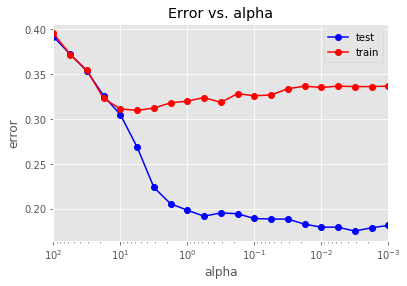

In [28]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'test')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'train')
plt.xlim([np.max(alpha_arr), np.min(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass


In [29]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.17525125628140703 0.3095703125


In [31]:
alpha_opt = alpha_arr[test_err == min_test_err]
alpha_opt = alpha_opt[0]
print(alpha_opt)

[5.62341325]


Ошибка при оптимальном alpha:

In [32]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (2,),
                          solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

0.2686348408710218
0.3095703125


Нарисуем матрицу рассогласования:

In [34]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_pred, y_test))

[[ 185   60    4    0]
 [ 226 1107  214   22]
 [   5   70  122   33]
 [   0    0    0    0]]


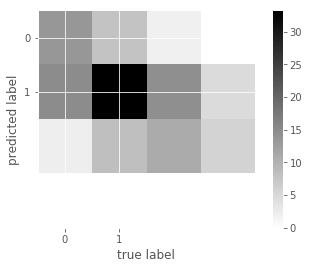

In [35]:
M = confusion_matrix(y_test_pred, y_test)
M = np.sqrt(M)
plt.imshow(M, interpolation = 'nearest')
plt.set_cmap('binary')
plt.xticks(range(2))
plt.yticks(range(2))
plt.xlabel("true label")
plt.ylabel("predicted label")
plt.colorbar()
pass

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))


              precision    recall  f1-score   support

          -1       0.74      0.44      0.56       416
           0       0.71      0.89      0.79      1237
           1       0.53      0.36      0.43       340
           2       0.00      0.00      0.00        55

   micro avg       0.69      0.69      0.69      2048
   macro avg       0.49      0.42      0.44      2048
weighted avg       0.67      0.69      0.66      2048



/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


**HW 3**
Решим задачу поиска хороших фильмов с помощью **Random Forest******

In [40]:

from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 10)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Проверим качество классификатора по величине ошибки на тестовой и обучающей выборках

In [41]:
err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print("Ошибка на обучающей выборке: ", err_train)
print("Ошибка на тестовой выборке: ", err_test)

Ошибка на обучающей выборке:  0.03936348408710218
Ошибка на тестовой выборке:  0.3232421875


Наблюдается **ситуация переобучения**, т.к. ошибка на тестовой выборке оказалась сильно выше, чем на обучающей
Построим график зависимости ошибки на тестовой и обучающей выборках и oob-ошибки от количества деревьев. Установим значение парметра* oob_score = True,* данный параметр определяет использовать ли out-of-bag объекты для оценки

Рассмотрим график на диапазоне от 1 до 10.

In [42]:
tree_arr = np.arange(1, 10, 1)
test_err = []
train_err = []
oob_err = []

for tree in tree_arr:
    rf = ensemble.RandomForestClassifier(n_estimators = tree, oob_score = True)
    rf.fit(X_train, y_train)
    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    oob_err.append(1 - rf.oob_score_)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees we

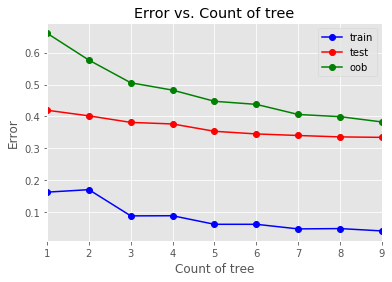

In [43]:
plt.plot(tree_arr, train_err, 'b-o', label = 'train')
plt.plot(tree_arr, test_err, 'r-o', label = 'test')
plt.plot(tree_arr, oob_err, 'g-o', label = 'oob')
plt.xlim([np.min(tree_arr), np.max(tree_arr)])
plt.title('Error vs. Count of tree')
plt.xlabel('Count of tree')
plt.ylabel('Error')
plt.legend()
pass

На всем диапазоне значений наблюдается ситуация переобучения, также видим, что oob ошибка превосходит ошибку на тестовой и обучающей выборках, причем с увеличением количества деревьев, значение oob-ошибки постепенно уменьшается.
При 3 деревьях ~ 0.5, при 6 ~ 0.45, при 9 ~ 0.38
Рассмотрим график на диапазоне от 10 до 100.

In [44]:
tree_arr = np.arange(10, 100, 5)
test_err = []
train_err = []
oob_err = []

for tree in tree_arr:
    rf = ensemble.RandomForestClassifier(n_estimators = tree, oob_score = True)
    rf.fit(X_train, y_train)
    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    oob_err.append(1 - rf.oob_score_)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


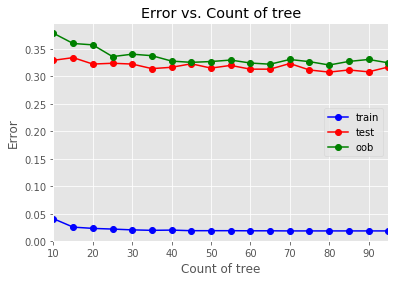

In [45]:
plt.plot(tree_arr, train_err, 'b-o', label = 'train')
plt.plot(tree_arr, test_err, 'r-o', label = 'test')
plt.plot(tree_arr, oob_err, 'g-o', label = 'oob')
plt.xlim([np.min(tree_arr), np.max(tree_arr)])
plt.title('Error vs. Count of tree')
plt.xlabel('Count of tree')
plt.ylabel('Error')
plt.legend()
pass

Так же видим дикое переобучение. Данный алгоритм плохо подходит для нашей задачи.

In [53]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)

print("Минимальная ошибка на обучающей выборке: ", min_train_err)
print("Минимальная ошибка на тестовой выборке: ", min_test_err)


Минимальная ошибка на обучающей выборке:  0.018634840871021775
Минимальная ошибка на тестовой выборке:  0.31005859375


Рассмотрим применение **Extremely Randomized Trees**

In [46]:
ert = ensemble.ExtraTreesClassifier(n_estimators = 10)
ert.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

Проверим качество классификатора по величине ошибки на тестовой и обучающей выборках

In [47]:
err_train = np.mean(y_train != ert.predict(X_train))
err_test  = np.mean(y_test  != ert.predict(X_test))

print("Ошибка на обучающей выборке: ", err_train)
print("Ошибка на тестовой выборке: ", err_test)

Ошибка на обучающей выборке:  0.018634840871021775
Ошибка на тестовой выборке:  0.34765625


Картина не меняется. Смотрим графики.
Рассмотрим график на диапазоне от 1 до 10.

In [48]:
tree_arr = np.arange(1, 10, 1)
test_err = []
train_err = []
oob_err = []
for tree in tree_arr:
    ert = ensemble.ExtraTreesClassifier(n_estimators = tree, oob_score=True, bootstrap=True)
    ert.fit(X_train, y_train)
    train_err.append(np.mean(y_train != ert.predict(X_train)))
    test_err.append(np.mean(y_test  != ert.predict(X_test)))
    oob_err.append(1 - ert.oob_score_)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees we

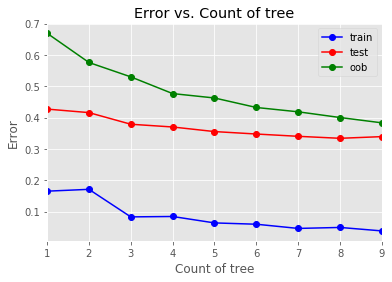

In [49]:
plt.plot(tree_arr, train_err, 'b-o', label = 'train')
plt.plot(tree_arr, test_err, 'r-o', label = 'test')
plt.plot(tree_arr, oob_err, 'g-o', label = 'oob')
plt.xlim([np.min(tree_arr), np.max(tree_arr)])
plt.title('Error vs. Count of tree')
plt.xlabel('Count of tree')
plt.ylabel('Error')
plt.legend()
pass

Ситуация аналогичная обычным Random Forest
Рассмотрим график на диапазоне от 10 до 100.



In [50]:
tree_arr = np.arange(10, 100, 5)
test_err = []
train_err = []
oob_err = []
for tree in tree_arr:
    ert = ensemble.ExtraTreesClassifier(n_estimators = tree, oob_score=True, bootstrap=True)
    ert.fit(X_train, y_train)
    train_err.append(np.mean(y_train != ert.predict(X_train)))
    test_err.append(np.mean(y_test  != ert.predict(X_test)))
    oob_err.append(1 - ert.oob_score_)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


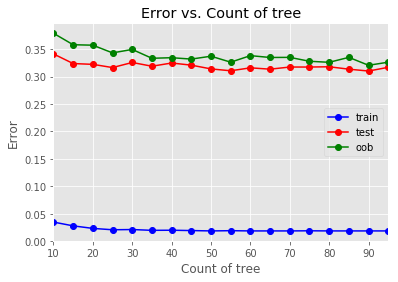

In [51]:
plt.plot(tree_arr, train_err, 'b-o', label = 'train')
plt.plot(tree_arr, test_err, 'r-o', label = 'test')
plt.plot(tree_arr, oob_err, 'g-o', label = 'oob')
plt.xlim([np.min(tree_arr), np.max(tree_arr)])
plt.title('Error vs. Count of tree')
plt.xlabel('Count of tree')
plt.ylabel('Error')
plt.legend()
pass


Ничего толком не поменялось.

In [52]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)

print("Минимальная ошибка на обучающей выборке: ", min_train_err)
print("Минимальная ошибка на тестовой выборке: ", min_test_err)

Минимальная ошибка на обучающей выборке:  0.018634840871021775
Минимальная ошибка на тестовой выборке:  0.31005859375



Минимальная ошибка получилась немного меньше

**AdaBoost**

In [54]:
ab = ensemble.AdaBoostClassifier(n_estimators = 5)
ab.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=5, random_state=None)

In [55]:
err_train = np.mean(y_train != ab.predict(X_train))
err_test  = np.mean(y_test  != ab.predict(X_test))

print("Ошибка на обучающей выборке: ", err_train)
print("Ошибка на тестовой выборке: ", err_test)



Ошибка на обучающей выборке:  0.3492462311557789
Ошибка на тестовой выборке:  0.34130859375


Тут картина больше похожа на нормальную, по крайней мере переобучение не наблюдается. Строим графики.

In [57]:
estimator_arr = np.arange(1, 50, 2)
test_err = []
train_err = []
for estimator in estimator_arr:
    ab = ensemble.AdaBoostClassifier(n_estimators = estimator)
    ab.fit(X_train, y_train)
    train_err.append(np.mean(y_train != ab.predict(X_train)))
    test_err.append(np.mean(y_test  != ab.predict(X_test)))

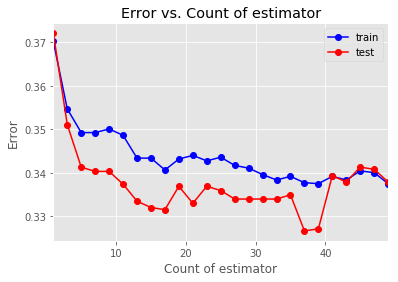

In [58]:
plt.plot(estimator_arr, train_err, 'b-o', label = 'train')
plt.plot(estimator_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(estimator_arr), np.max(estimator_arr)])
plt.title('Error vs. Count of estimator')
plt.xlabel('Count of estimator')
plt.ylabel('Error')
plt.legend()
pass

In [59]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)

print("Минимальная ошибка на обучающей выборке: ", min_train_err)
print("Минимальная ошибка на тестовой выборке: ", min_test_err)

Минимальная ошибка на обучающей выборке:  0.33752093802345057
Минимальная ошибка на тестовой выборке:  0.32666015625


***Gradient boosted trees***

In [60]:
gbt = ensemble.GradientBoostingClassifier(n_estimators = 10)
gbt.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=10,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

Проверим качество классификатора по величине ошибки на тестовой и обучающей выборках

In [61]:
err_train = np.mean(y_train != gbt.predict(X_train))
err_test  = np.mean(y_test  != gbt.predict(X_test))

print("Ошибка на обучающей выборке: ", err_train)
print("Ошибка на тестовой выборке: ", err_test)

Ошибка на обучающей выборке:  0.326214405360134
Ошибка на тестовой выборке:  0.33251953125


Ситуация аналогичная алгоритму AdaBoost. Переобучение не наблюдается, однако ошибка по-прежнему высокая. Строим графики.

In [62]:
tree_arr = np.arange(1, 50, 2)
test_err = []
train_err = []
for tree in tree_arr:
    gbt = ensemble.GradientBoostingClassifier(n_estimators = tree)
    gbt.fit(X_train, y_train)
    
    y_train_pred = gbt.predict(X_train)
    y_test_pred = gbt.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

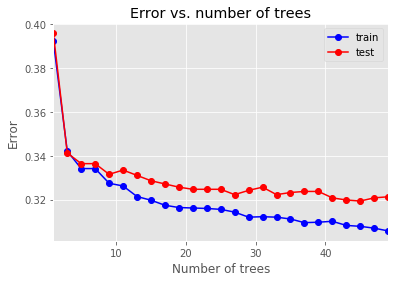

In [63]:
plt.plot(tree_arr, train_err, 'b-o', label = 'train')
plt.plot(tree_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(tree_arr), np.max(tree_arr)])
plt.title('Error vs. number of trees')
plt.xlabel('Number of trees')
plt.ylabel('Error')
plt.legend()
pass

In [66]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)

print("Минимальная ошибка на обучающей выборке: ", min_train_err)
print("Минимальная ошибка на тестовой выборке: ", min_test_err)

min_test_err_index = np.argmin(test_err)

print("Минимальная ошибка достигается при значении ", min_test_err_index*2 + 1)

Минимальная ошибка на обучающей выборке:  0.30569514237855944
Минимальная ошибка на тестовой выборке:  0.3193359375
Минимальная ошибка достигается при значении  45


**HW 4**

С помощью метода главных компонент осуществим уменьшение размерности исходных данных и осуществим классификацию фильмов на хорошие и плохие

Взглянем на наши данные до использования PCA

In [65]:
X.shape

(6824, 1585)

In [81]:
from sklearn import decomposition 
pca = decomposition.PCA(n_components = 20)
X_train_reduc = pca.fit_transform(X_train)
X_test_reduc = pca.transform(X_test)

In [82]:
from sklearn import ensemble
ert = ensemble.ExtraTreesClassifier(n_estimators = 100).fit(X_train, y_train)

err_train = np.mean(y_train != ert.predict(X_train))
err_test  = np.mean(y_test  != ert.predict(X_test))

print(err_train, err_test)

0.018634840871021775 0.32373046875


Имеет место переобучение (ошибка на обучающей выборке меньше, чем на тестовой).
Построим графики зависимости ошибок (ошибка на обучающей выборке и ошибка на тестовой выборке) от количества компонент в методе

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25]


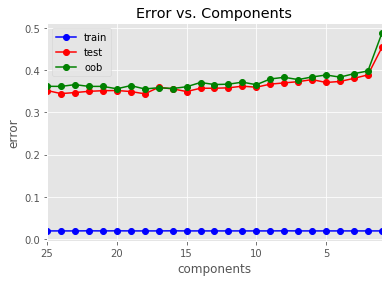

In [83]:
components_arr = np.arange(1, 26, 1)
print(components_arr)
test_err = []
train_err = []
oob_err = []
from sklearn.decomposition import PCA
for components in components_arr:
    pca = PCA(n_components = components)
    X_pca_train = pca.fit_transform(X_train)
    X_pca_test = pca.transform(X_test)
    ert = ensemble.ExtraTreesClassifier(n_estimators = 100, oob_score=True, bootstrap=True)
    ert.fit(X_pca_train, y_train)
    train_err.append(np.mean(y_train != ert.predict(X_pca_train)))
    test_err.append(np.mean(y_test  != ert.predict(X_pca_test)))
    oob_err.append(1 - ert.oob_score_)
plt.plot(components_arr, train_err, 'b-o', label = 'train')
plt.plot(components_arr, test_err, 'r-o', label = 'test')
plt.plot(components_arr, oob_err, 'g-o', label = 'oob')
plt.xlim([np.max(components_arr), np.min(components_arr)])
plt.title('Error vs. Components')
plt.xlabel('components')
plt.ylabel('error')
plt.legend()
pass

Найдем минимальное значение ошибки:

In [84]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)

print ('Min error train:', min_train_err)
print ('Min error test:', min_test_err)

Min error train: 0.0190536013400335
Min error test: 0.34423828125



Оптимальное число компонент в методе:

In [85]:
components_opt = components_arr[test_err == min_test_err]
components_opt = components_opt[0]
print(components_opt)

18
